### Outline
1. Create dependencies and create path to data
2. Merge suicide rates and happiness into single DF
    a. Happiness DF
    b. Suicide DF
    c. Happiness + Suicide DF

### Visualizations
1. Horizontal Stacked Bar - Countries happiness + happiness indicators
2. Cartogram - Happiness heat map
3. Vertical Bar - Countries Happiness Level vs. Total Population Suicide Rate
4. Bottom 50 Happiness vs. Total Population Suicide Rate
5. Top 50 Happiness vs. Total Population Suicide Rate 
6. Scatter Plot - All Countries Happiness vs. Total Population Suicide Rate

In [62]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import geopandas as gpd
%matplotlib notebook
%matplotlib inline
from pandas.plotting import table

# Import API key
from config import gkey

# Pull original data
full_suicide_df=pd.read_csv("Data/2016 WHO Sucide Rate Estimates.csv", header=None,skiprows=[0,1])
happiness_df=pd.read_csv("Data/2016 World Happiness Report.csv")
location_df=pd.read_csv("Data/Long And Lat.csv")

# Clean suicide data by deleting duplicated country rows
almost_suicide_df=full_suicide_df.drop_duplicates(subset=[0],keep="first")

# Drop uncessary column in suicide dataframe
suicide_df=almost_suicide_df.drop([1],axis=1)

# Rename columns in suicide dataframe
suicide_df.rename(columns={0:'Country',2:'2016',3:'2015',4:'2014',5:'2013'},inplace=True)

# Merge data into single dataframe
merged_df=pd.merge(happiness_df,suicide_df,how="left",on=["Country","Country"])

# Location merged data
location_merged_df=pd.merge(merged_df,location_df,how="left",on=["Country","Country"])
location_merged_df=location_merged_df.dropna()

## Complete Dataframe: Countries, Happiness Indicators, Suicide Rates, and Lats/Lons

In [63]:
location_merged_df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,2016,2015,2014,2013,code,latitude,longitude
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,9.2,8.6,9.3,12.7,DK,56.263920,9.501785
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,11.3,11.4,11.3,16.8,CH,46.818188,8.227512
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,13.3,12.9,12.3,16.0,IS,64.963051,-19.020835
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,10.1,10.2,10.6,12.0,NO,60.472024,8.468946
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,13.8,12.4,16.6,21.6,FI,61.924110,25.748151


## Happiness Map
### Indicates happiness based on color intensity per country

In [64]:
# Create filepath to map geodataframe and read

map_fp="Data/World_Countries.shp"
map_df=gpd.read_file(map_fp)

In [65]:
# Create map compatible happiness dataframe

data_for_map = "Data/2016 World Happiness Report2.csv"
data_for_map = pd.read_csv(data_for_map)

In [66]:
# Join the geodataframe with the cleaned up happiness dataframe

merged = pd.merge(map_df, data_for_map)

C:\Users\smm11\anaconda3\envs\geo_env\lib\site-packages\geopandas\plotting.py:463: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


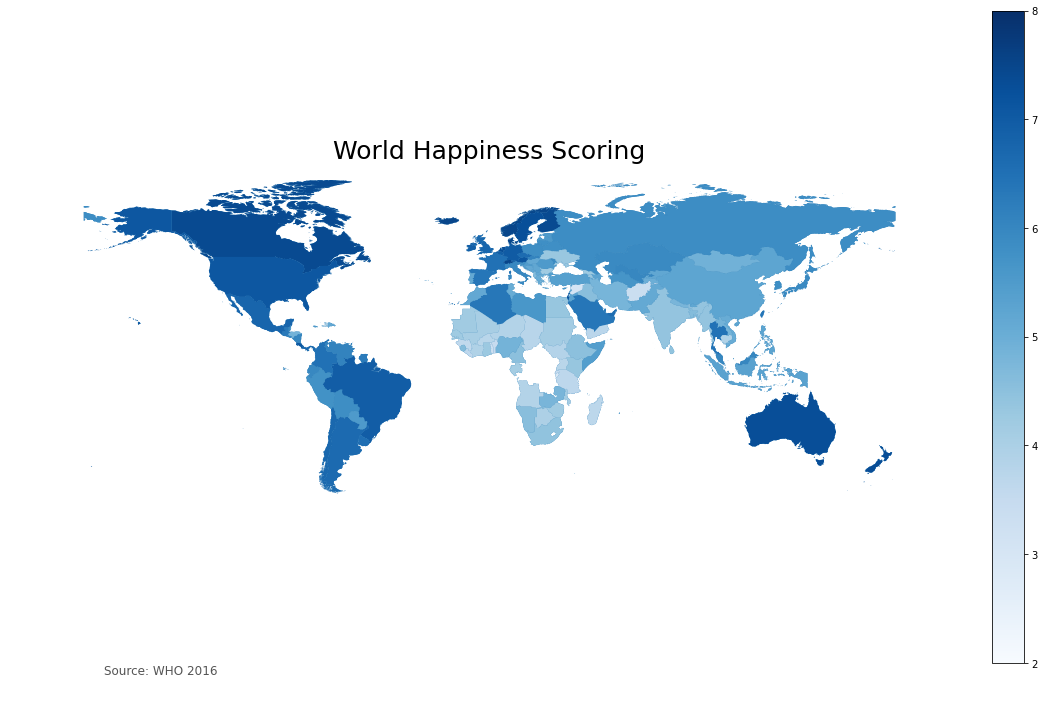

In [67]:
# Set a variable that will call whatever column we want to visualise on the map

variable = "Happiness Score"

# Create figure and axes through Matplotlib

fig, ax = plt.subplots(1, figsize=(20, 12))
ax = merged.plot(axes=ax)
ax.set_axis_off()

# add a title
ax.set_title("World Happiness Scoring", fontdict={"fontsize": "25", "fontweight" : "3"})

# create an annotation for the data source
ax.annotate("Source: WHO 2016",xy=(0.1, .08),  xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize=12, color="#555555")

# set the range for the choropleth
vmin, vmax = 2, 8
merged.plot(column=variable, cmap='Blues', vmin=vmin, vmax=vmax, linewidth=0.8, ax=ax, legend=True, edgecolor=None)
plt.savefig("Plot_5")

## Happiness Index Breakdown by Indicator per Country

### Top 50 Countries

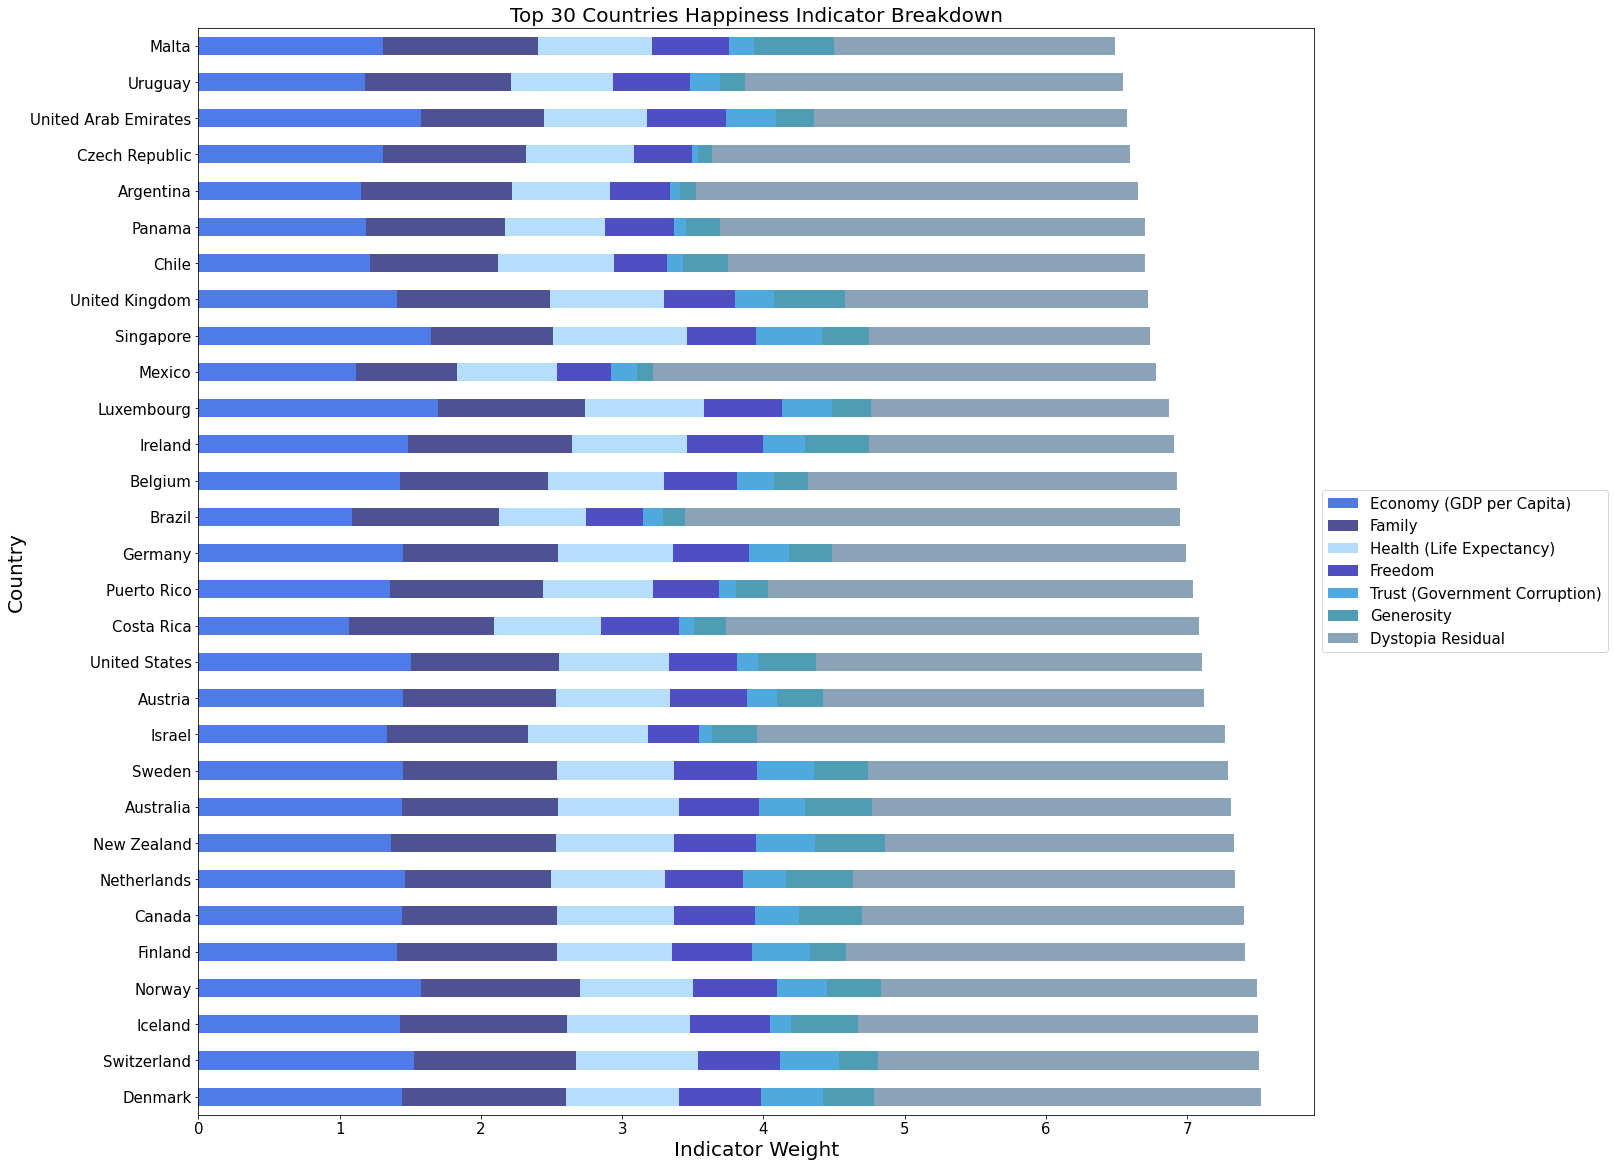

In [69]:
happiness_top30_df=top30_df[["Country","Economy (GDP per Capita)","Family","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity","Dystopia Residual"]]
y=happiness_top30_df.set_index("Country")
pal = ["#0343DF","#030764","#95D0FC","#0504AA","#0485D1","#047495","#5A7D9A"]
y.plot.barh(stacked=True,alpha=0.7,color=pal)
plt.rcParams["figure.figsize"]=(20,20)
plt.title("Top 30 Countries Happiness Indicator Breakdown",fontsize=20)
plt.ylabel("Country",fontsize=20)
plt.xlabel("Indicator Weight",fontsize=20)
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)
plt.legend(loc="center left",prop={'size': 15},bbox_to_anchor=(1,0.5))
plt.savefig("Plot_2")

### Bottom 50 Countries

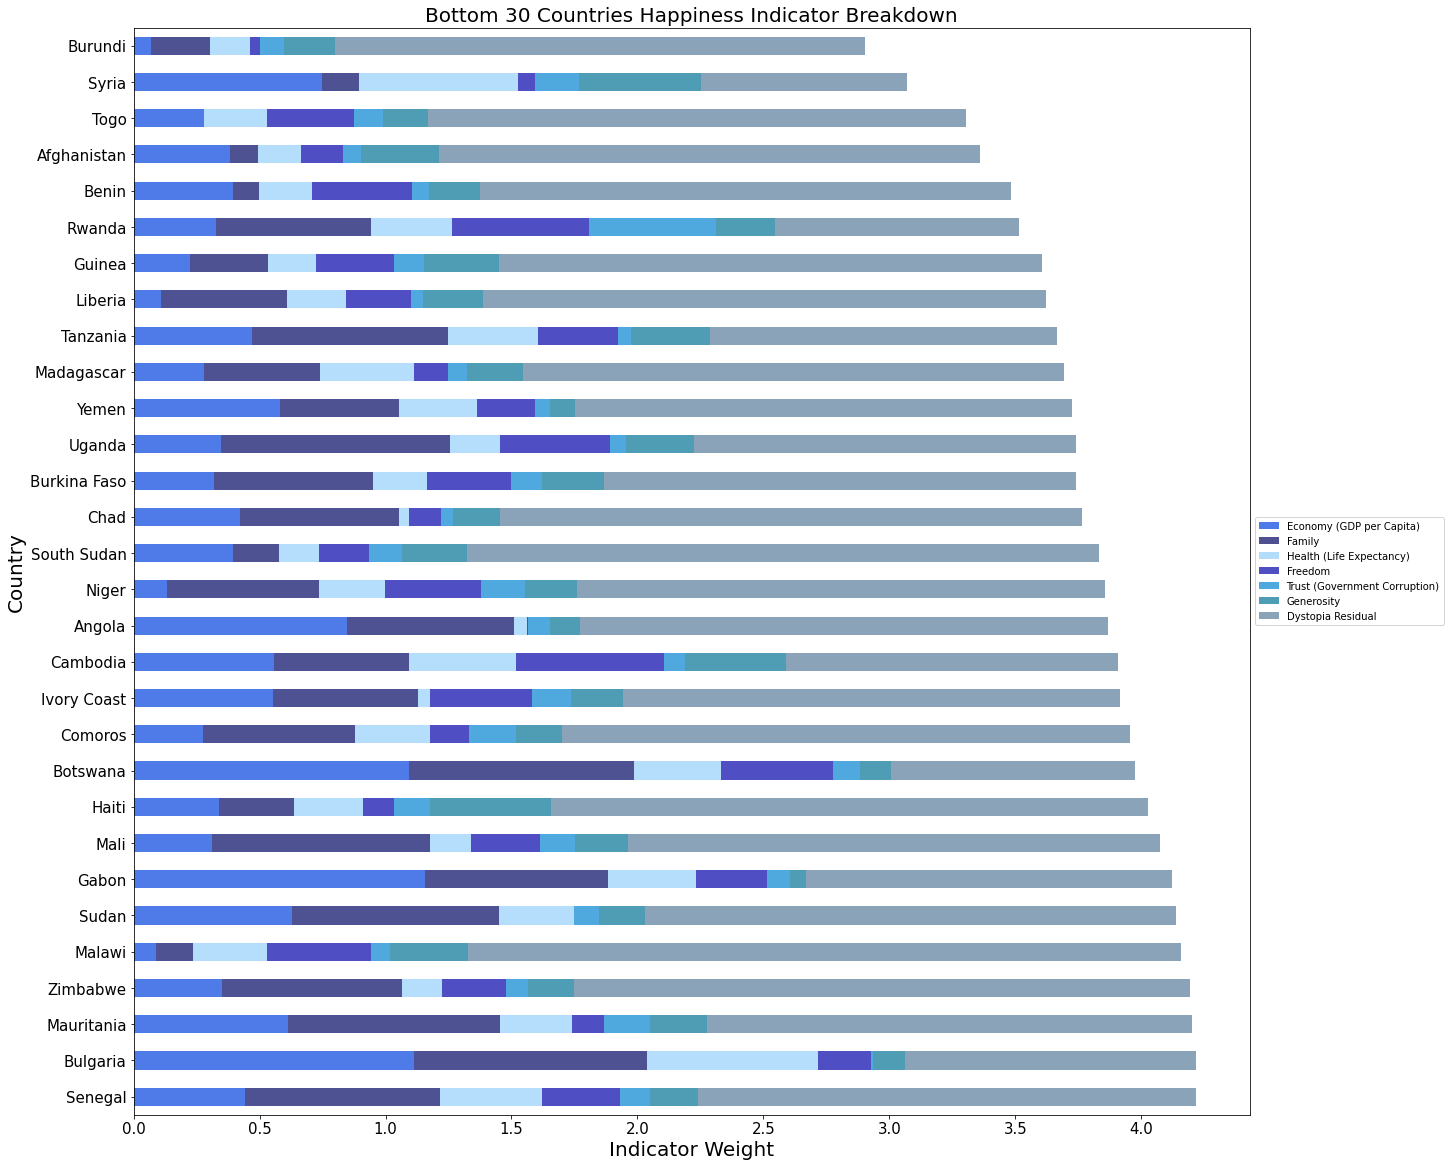

In [70]:
happiness_low30_df=low30_df[["Country","Economy (GDP per Capita)","Family","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity","Dystopia Residual"]]
y=happiness_low30_df.set_index("Country")
pal = ["#0343DF","#030764","#95D0FC","#0504AA","#0485D1","#047495","#5A7D9A"]
y.plot.barh(stacked=True,alpha=0.7,color=pal)
plt.title("Bottom 30 Countries Happiness Indicator Breakdown",fontsize=20)
plt.ylabel("Country",fontsize=20)
plt.xlabel("Indicator Weight",fontsize=20)
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)
plt.legend(loc="center left",prop={'size': 10},bbox_to_anchor=(1,0.5))
plt.savefig("Plot_3")

## Countries Happiness Index vs. Total Population Suicide Rate (2016)

### Top 10 Countries

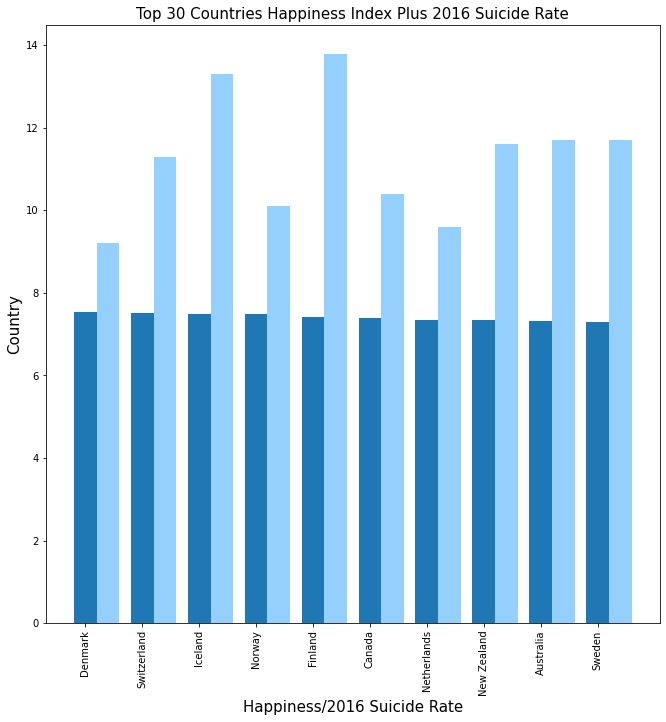

In [87]:
# # Calculate total population suicide rate per country
# Avg_Suicide_Rate=suicide_df

# Horizontal stacked bar chart
top30_df= merged_df.loc[0:29]
low30_df=merged_df.loc[127:156]

top10_df=merged_df.loc[0:9]
low10_df=merged_df.loc[147:156]

top_Happy_Score=top10_df["Happiness Score"]
top_Suicide_Rate=top10_df["2016"]
topIndex=top10_df["Country"]

w=0.4

plt.bar(np.arange(len(top_Happy_Score)),top_Happy_Score,width=w)
plt.bar(np.arange(len(top_Suicide_Rate))+w,top_Suicide_Rate,width=w,color="#95D0FC")
plt.xticks(range(0,len(topIndex)), topIndex,rotation="vertical")

plt.rcParams["figure.figsize"]=(11,11)
plt.title("Top 30 Countries Happiness Index Plus 2016 Suicide Rate",fontsize=15)
plt.ylabel("Country",fontsize=15)
plt.xlabel("Happiness/2016 Suicide Rate",fontsize=15)
plt.rc('xtick', labelsize=10)     
plt.rc('ytick', labelsize=10)
plt.savefig("Plot_1")
plt.show()

### Bottom 10 Countries

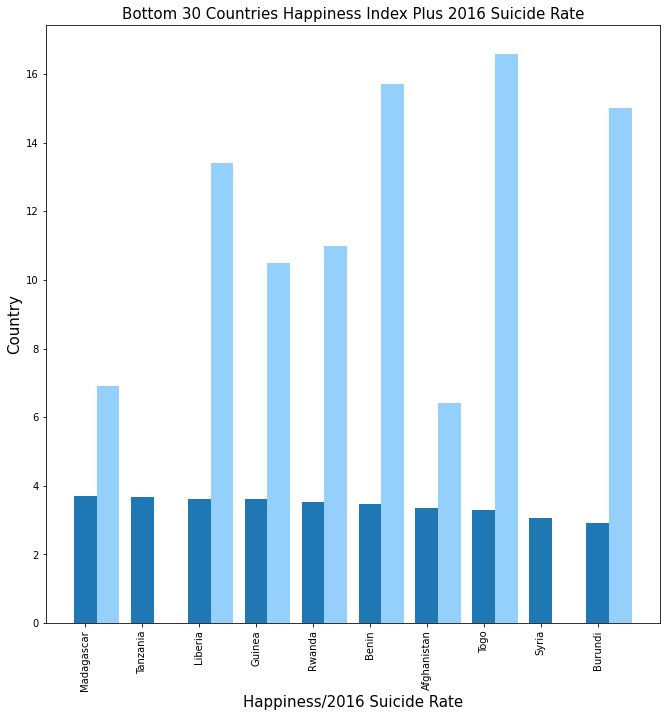

In [88]:
# # Calculate total population suicide rate per country
# Avg_Suicide_Rate=suicide_df

# Horizontal stacked bar chart

low_Happy_Score=low10_df["Happiness Score"]
low_Suicide_Rate=low10_df["2016"]
lowIndex=low10_df["Country"]
x=["low_Happy_Score","low_Suicide_Rate"]

plt.bar(np.arange(len(low_Happy_Score)),low_Happy_Score,width=w)
plt.bar(np.arange(len(low_Suicide_Rate))+w,low_Suicide_Rate,width=w,color="#95D0FC")
plt.xticks(range(0,len(lowIndex)), lowIndex,rotation="vertical")

plt.rcParams["figure.figsize"]=(11,11)
plt.title("Bottom 30 Countries Happiness Index Plus 2016 Suicide Rate",fontsize=15)
plt.ylabel("Country",fontsize=15)
plt.xlabel("Happiness/2016 Suicide Rate",fontsize=15)
plt.rc('xtick', labelsize=10)     
plt.rc('ytick', labelsize=10)
plt.savefig("Plot_1")
plt.show()

## All Countries Final Happiness vs. Suicide Rate Comparison

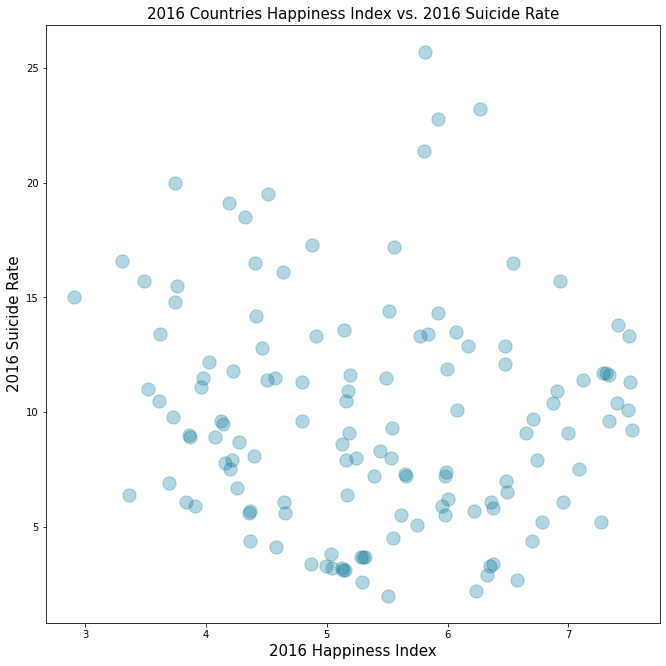

In [89]:
all_Happy_Score=merged_df["Happiness Score"]
all_Suicide_Rate=merged_df["2016"]
# s=np.random.random(157)

plt.scatter(all_Happy_Score,all_Suicide_Rate,alpha=0.3,s=175,c="#047495")
plt.title("2016 Countries Happiness Index vs. 2016 Suicide Rate",fontsize=15)
plt.ylabel("2016 Suicide Rate",fontsize=15)
plt.xlabel("2016 Happiness Index",fontsize=15)
plt.rc('xtick', labelsize=10)     
plt.rc('ytick', labelsize=10)
plt.rcParams["figure.figsize"]=(10,10)
plt.savefig("Plot_4")
plt.show()